# customer_churn

In [2]:
import pandas as pd
dataset=pd.read_csv(r"C:\Users\ADMIN\Documents\Churn_Modelling.csv")
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
dataset.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [4]:
dataset.drop(columns = ['RowNumber','CustomerId','Surname'],inplace=True)

In [5]:
dataset.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [6]:
dataset['Geography'].value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

In [8]:
dataset['Gender'].value_counts()

Gender
Male      5457
Female    4543
Name: count, dtype: int64

In [10]:
dataset = pd.get_dummies(dataset,columns=['Geography','Gender'],drop_first=True)

In [11]:
X = dataset.drop(columns=['Exited'])
y = dataset['Exited'].values

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [12]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_trf = scaler.fit_transform(X_train)
X_test_trf = scaler.transform(X_test)

In [13]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential 
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [14]:
model = Sequential()

model.add(Dense(64,activation='sigmoid',input_dim=11))
model.add(Dense(32,activation='relu'))
Dropout(0.2)
model.add(Dense(32,activation='relu'))
Dropout(0.2)
model.add(Dense(32,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

C:\Users\ADMIN\AppData\Roaming\Python\Python313\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [15]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 64)                  │             768 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,993 (19.50 KB)

 Trainable params: 4,993 (19.50 KB)

 Non-trainable params: 0 (0.00 B)

In [16]:
model.compile(optimizer='Adam',loss='binary_crossentropy',metrics=['accuracy'])

In [17]:
# Define early stopping callback
early_stopping = EarlyStopping(
    monitor='val_loss',  # Metric to monitor
    patience=5,          # Number of epochs with no improvement before stopping
    restore_best_weights=True  # Restore model weights from the best epoch
)

In [18]:
history = model.fit(X_train_trf,y_train,batch_size=20,epochs=50,verbose=1,validation_split=0.2,callbacks=[early_stopping])

Epoch 1/50
320/320 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.8023 - loss: 0.4654 - val_accuracy: 0.8100 - val_loss: 0.4332
Epoch 2/50
320/320 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8087 - loss: 0.4273 - val_accuracy: 0.8150 - val_loss: 0.4332
Epoch 3/50
320/320 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8233 - loss: 0.4167 - val_accuracy: 0.8269 - val_loss: 0.4114
Epoch 4/50
320/320 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8288 - loss: 0.4066 - val_accuracy: 0.8313 - val_loss: 0.4013
Epoch 5/50
320/320 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8367 - loss: 0.3891 - val_accuracy: 0.8438 - val_loss: 0.3747
Epoch 6/50
320/320 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.8553 - loss: 0.3548 - val_accuracy: 0.8575 - val_loss: 0.3642
Epoch 7/50
320/320 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8580 - loss: 0.3467 - val_accuracy: 0.8619 - val_loss: 0.3487
Epoch 8/50
320/320 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8591 - loss: 0.3418 - val_accuracy: 0.

In [19]:
model.get_weights()

[array([[ 2.28673160e-01,  1.78989053e-01, -1.46506429e-01,
          3.12908173e-01, -7.93530941e-02,  1.05415262e-01,
         -5.17764352e-02, -3.23869996e-02, -1.76985115e-01,
         -8.97046775e-02,  1.98499653e-02, -8.14339221e-02,
          2.73985595e-01,  1.57056794e-01, -2.45545954e-02,
          2.13894397e-01,  1.57558039e-01,  1.46672294e-01,
          4.98490706e-02, -5.50119430e-02,  1.53705969e-01,
          2.31173784e-01, -1.55440748e-01, -3.22346091e-02,
         -7.36694261e-02, -5.07291704e-02, -1.70877296e-02,
          2.45861486e-02,  3.71731669e-02, -7.73979053e-02,
         -1.27074704e-01,  1.48761064e-01, -5.67100495e-02,
          5.52346334e-02,  3.41791123e-01, -2.14855939e-01,
         -4.67165373e-02,  1.99514274e-02,  8.13050494e-02,
         -1.74033687e-01,  1.89388409e-01,  2.43950531e-01,
          2.36419946e-01, -2.38693617e-02, -4.37463224e-02,
          1.76075362e-02, -2.38415569e-01, -1.21447884e-01,
          1.38192341e-01, -1.31234422e-0

In [20]:
y_pred = model.predict(X_test_trf)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step  


In [21]:
y_pred

array([[0.27861112],
       [0.28310844],
       [0.16877884],
       ...,
       [0.16704911],
       [0.13885796],
       [0.18412043]], dtype=float32)

In [22]:
y_pred = y_pred.argmax(axis=-1)

In [23]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.7975

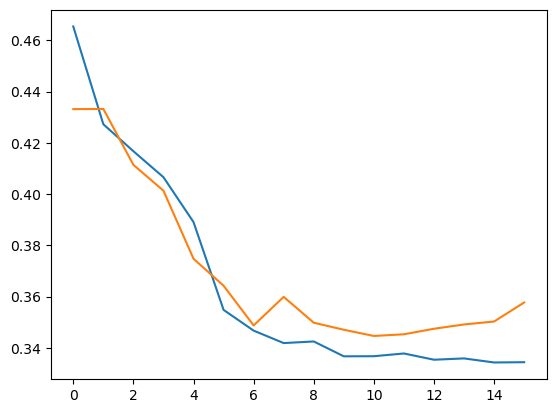

In [24]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])